In [1]:
   
import pandas as pd
train_datasets = pd.read_csv("../data/application_train.csv")
test_datasets = pd.read_csv("../data/application_test.csv")

# train datasets과 test datasets을 구분하는 "train/test" feature 생성
train_datasets["train/test"] = "train"
test_datasets["train/test"] = "test"

# 합치기
train_test_datasets = pd.concat([train_datasets, test_datasets], ignore_index=True)

# 356,255 행인지 확인
train_test_datasets.info()

# index 재설정
# print(train_datasets.index)
# print(test_datasets.index)
train_test_datasets.reset_index(drop=True, inplace=True)
#print(train_test_datasets.index)
app_train_df_4_1 = train_test_datasets.iloc[:, 30:40]
app_train_df_4_2 = train_test_datasets.iloc[:, 70:80]
app_train_df_4_3 = train_test_datasets.iloc[:, 110:120]

app_train_df_4_2 = app_train_df_4_2.fillna(0)
app_train_df_4_3 = app_train_df_4_3.fillna(0)

#30~39: 결측치 없음. unique: 1,2(이진분류), 요일(오브젝트), 24시간(24분류)
#70~79: 정규분포값, 결측치 다수, 그러나 그에 해당되지 않는 사람으로써 판단하고 0으로 대체
#110~119: 중 117,118,119 등 결측치 개수 동일, 최빈도수가 0 이므로 0으로 대체

FileNotFoundError: [Errno 2] No such file or directory: '../data/application_train.csv'

In [4]:
# 이 밑으로는 데이터 확인

#print(train_test_datasets.columns)

#train_test_datasets['TARGET']
# app_train_df_4_1 = train_test_datasets.iloc[:, 30:40]
# app_train_df_4_2 = train_test_datasets.iloc[:, 70:80]
# app_train_df_4_3 = train_test_datasets.iloc[:, 110:120]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'train/test'],
      dtype='object', length=123)


0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
356250    NaN
356251    NaN
356252    NaN
356253    NaN
356254    NaN
Name: TARGET, Length: 356255, dtype: float64

In [8]:
list_columns_4_1=list(app_train_df_4_1.columns)
for i in list_columns_4_1:
    print(app_train_df_4_1[i].describe())
    print('\n/////////////\n')
    print(app_train_df_4_1[i].value_counts())
    print('\n---------------\n')

count    356255.000000
mean          2.050506
std           0.510947
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

/////////////

2    262340
3     55954
1     37961
Name: REGION_RATING_CLIENT, dtype: int64

---------------

count    356255.000000
mean          2.028932
std           0.504586
min          -1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

/////////////

 2    265260
 3     50652
 1     40342
-1         1
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

---------------

count      356255
unique          7
top       TUESDAY
freq        63652
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

/////////////

TUESDAY      63652
WEDNESDAY    60391
MONDAY       59120
THURSDAY     59009
FRIDAY       57588
SATURDAY     38455
SUNDAY       18040
Name: WEEKDAY_APPR_PROCES

In [19]:
list_columns_4_2=list(app_train_df_4_2.columns)
for i in list_columns_4_2:
    print(app_train_df_4_2[i].describe())
    print('\n/////////////\n')
    print(app_train_df_4_2[i].value_counts())
    print('\n---------------\n')

count    307511.000000
mean          0.002469
std           0.025854
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64

/////////////

0.0000    272769
0.0039     14105
0.0078      6413
0.0117      3675
0.0156      2492
           ...  
0.5953         1
0.7626         1
0.7082         1
0.4708         1
0.6070         1
Name: NONLIVINGAPARTMENTS_MODE, Length: 167, dtype: int64

---------------

count    307511.000000
mean          0.012112
std           0.048916
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64

/////////////

0.0000    236808
0.0011       477
0.0046       466
0.0033       430
0.0012       427
           ...  
0.1908         1
0.5423         1
0.2705         1
0.2391         1
0.4109         1
Name: NONLIVINGAREA_MODE, Length: 3327, dtype: int64

--------

In [14]:
list_columns_4_3=list(app_train_df_4_3.columns)
for i in list_columns_4_3:
    print(app_train_df_4_3[i].describe())
    print('\n/////////////\n')
    print(app_train_df_4_3[i].value_counts())
    print('\n---------------\n')

count    307511.000000
mean          0.009928
std           0.099144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_16, dtype: float64

/////////////

0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64

---------------

count    307511.000000
mean          0.000267
std           0.016327
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_17, dtype: float64

/////////////

0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64

---------------

count    307511.000000
mean          0.008130
std           0.089798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_18, dtype: float64

/////////////

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64

---------------

count    307511.000000
mean          0.000595


In [16]:
# # 이상치 확인 - BOXPLOT
# def box_plot(datasets, feature):
#     sns.set_theme(style="whitegrid")
#     sns.boxplot(x=datasets[feature])
# # bar 그래프를 그리는 함수
# def bar_plot2(datasets, feature):
#     # label font size setting
#     parameters = {"axes.labelsize": 16,
#                 "axes.titlesize": 16} # 안 됨
#     plt.rcParams.update(parameters)
#     # 1행 2열 개로 표 나눔
#     fig, axes = plt.subplots(1, 2)
#     # 표 크기 설정
#     fig.set_size_inches(15, 7.5)
#     # 테마 설정
#     sns.set_theme(style="whitegrid")
#     # 기본 데이터 설정
#     temp1_ds = datasets.loc[:, ["TARGET", feature]]
#     # 글자 수 10개로 제한
#     temp1_ds[feature] = temp1_ds[feature].str.slice(start=0, stop=10)
#     temp2_ds = temp1_ds.loc[temp1_ds['TARGET'] == 1]
#     # 전체 데이터 개수 표시
#     sns.barplot(y=temp1_ds.iloc[:, 1].value_counts()[:6],
#                 x=temp1_ds.iloc[:, 1].value_counts()[:6].index,
#                 ax=axes[0]
#                 )
#     axes[0].set(xlabel="Unique values",
#                 ylabel="Counts",
#                 title="Total"
#             )
#     axes[0].set_xticklabels(labels=temp1_ds.iloc[:, 1].value_counts()[:6].index,
#                             rotation=25,
#                             fontsize=13
#                         )
#     temp_sum = sum(temp2_ds.iloc[:, 1].value_counts()[:6])
#     # TARGET == 1인 것만 표시
#     pie = axes[1].pie(temp2_ds.iloc[:, 1].value_counts()[:6],
#                       labels=temp2_ds.iloc[:, 1].value_counts()[:6].index,
#                       autopct=lambda x: "{0:.1f}%".format(x)
#                      )
#     plt.show()

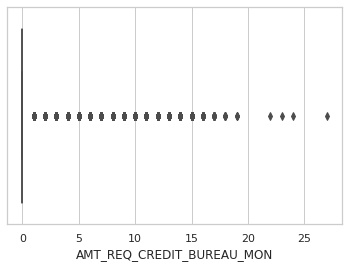

In [18]:
# import seaborn as sns
# box_plot(app_train_df_4_3,'AMT_REQ_CREDIT_BUREAU_MON')
#이상값 없음


In [22]:
#app_train_df[(app_train_df['SK_ID_CURR']==5061827)]
# bureau Id와 안겹침

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
#app_train_df[(app_train_df['NAME_FAMILY_STATUS']=='Married')&(app_train_df['FLAG_OWN_REALTY']=='Y')]
# 부부특성( 부부는 집을 차보다 더 많은 비중을 차지하고있을것같다)